In [1]:
import pandas as pd
import matplotlib.pyplot as plt
spotify_csv = r"C:\Users\hayde\Downloads\archive\spotify_data.csv"
spotify_data= pd.read_csv(spotify_csv)
spotify_data.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


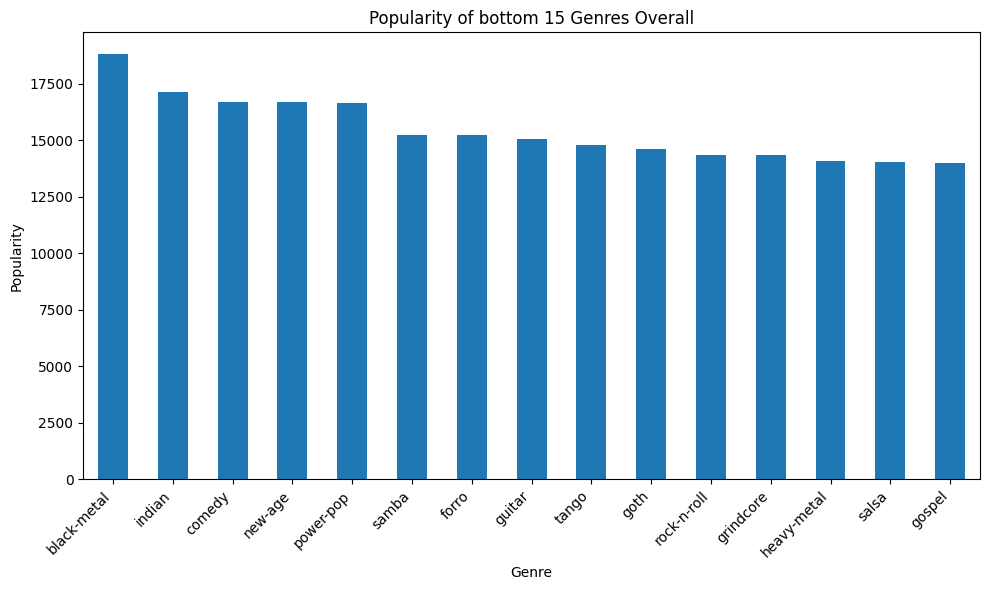

In [5]:
spotify_clean = spotify_data.drop(['track_id', 'duration_ms', 'Unnamed: 0', 'valence', 'key', 'mode', 'liveness', 'time_signature'], axis=1)


popular_data = spotify_clean[spotify_clean['popularity'] <= 20]


genre_counts = popular_data['genre'].value_counts()


num_genres_to_show = 15
top_genres = genre_counts.nlargest(num_genres_to_show)


plt.figure(figsize=(10, 6)) 


top_genres.plot(kind='bar')

plt.xlabel('Genre')  
plt.ylabel('Popularity')  
plt.title(f'Popularity of bottom {num_genres_to_show} Genres Overall')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()


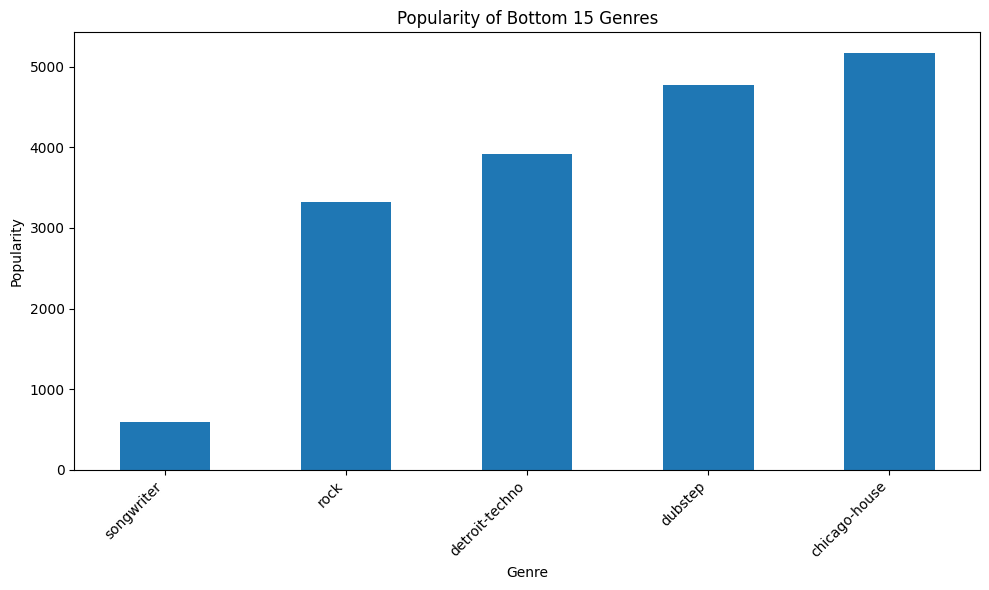

In [12]:
spotify_clean = spotify_data.drop(['track_id', 'duration_ms', 'Unnamed: 0', 'valence', 'key', 'mode', 'liveness', 'time_signature'], axis=1)

genre_counts = spotify_clean['genre'].value_counts()

bottom_genres = genre_counts.nsmallest(5)


plt.figure(figsize=(10, 6))  
bottom_genres.plot(kind='bar')

plt.xlabel('Genre')  
plt.ylabel('Popularity')  
plt.title('Popularity of Bottom 15 Genres')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

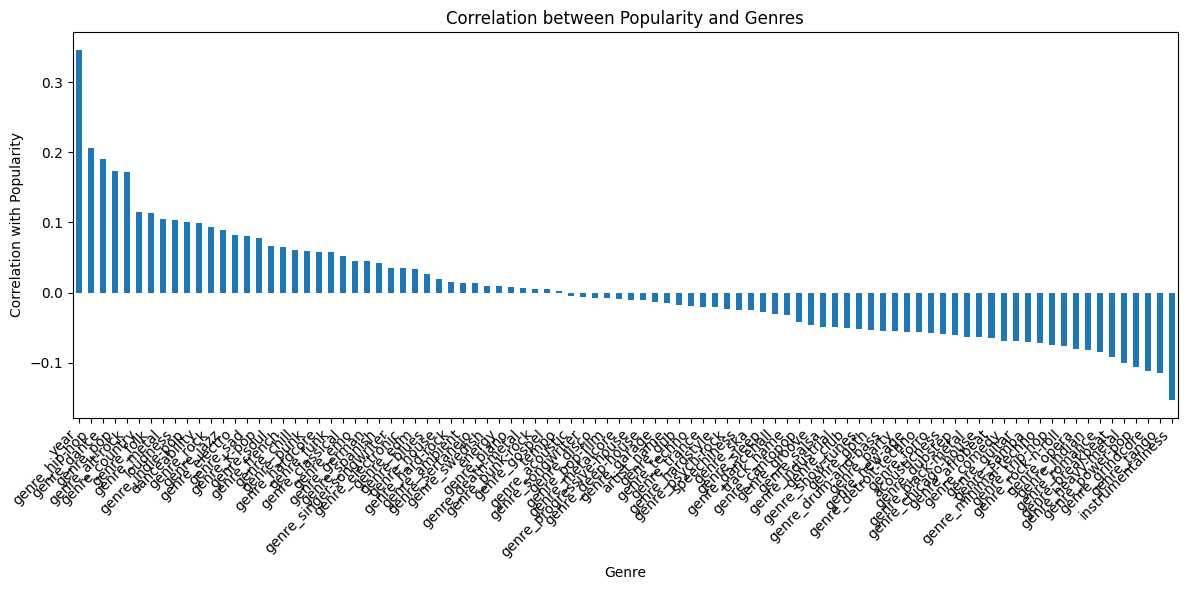

In [10]:

spotify_clean = spotify_data.drop(['track_id', 'duration_ms', 'Unnamed: 0', 'valence', 'key', 'mode', 'liveness', 'time_signature'], axis=1)


spotify_encoded = pd.get_dummies(spotify_clean, columns=['genre'])

spotify_encoded = spotify_encoded.apply(pd.to_numeric, errors='coerce')


correlation_data = spotify_encoded.corr()['popularity']


correlation_data.drop('popularity', inplace=True)


plt.figure(figsize=(12, 6))
correlation_data.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Correlation with Popularity')
plt.title('Correlation between Popularity and Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

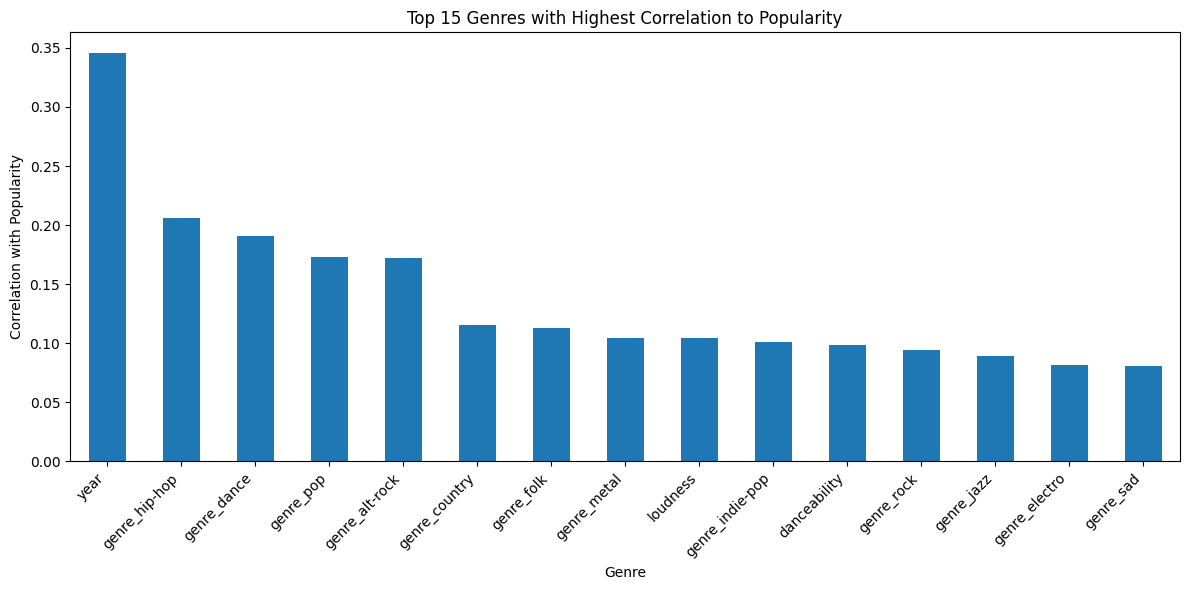

In [11]:

spotify_clean = spotify_data.drop(['track_id', 'duration_ms', 'Unnamed: 0', 'valence', 'key', 'mode', 'liveness', 'time_signature'], axis=1)


spotify_encoded = pd.get_dummies(spotify_clean, columns=['genre'])


spotify_encoded = spotify_encoded.apply(pd.to_numeric, errors='coerce')

correlation_data = spotify_encoded.corr()['popularity']


correlation_data.drop('popularity', inplace=True)


top_15_genres = correlation_data.nlargest(15)

plt.figure(figsize=(12, 6))
top_15_genres.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Correlation with Popularity')
plt.title('Top 15 Genres with Highest Correlation to Popularity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

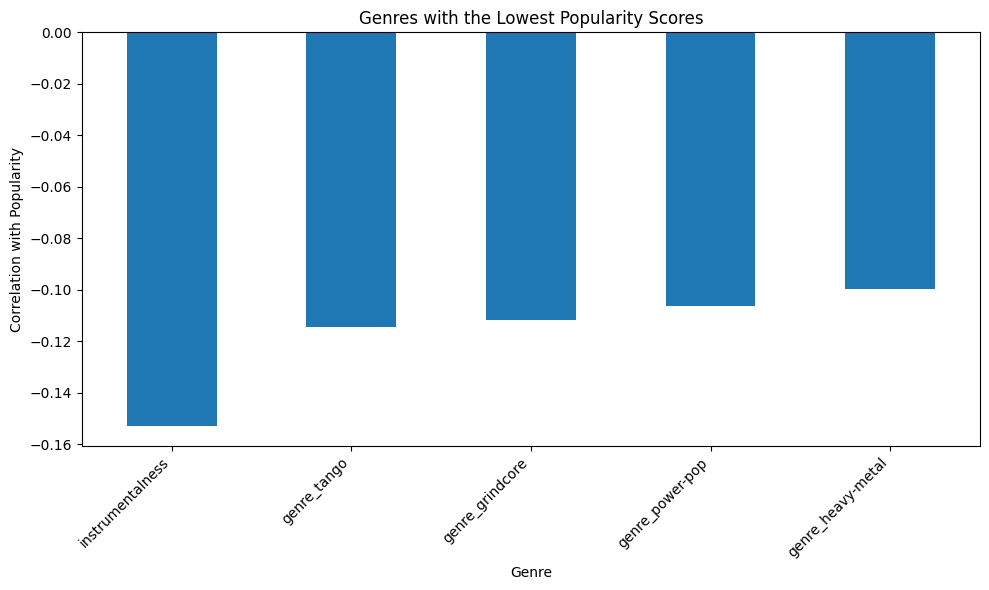

In [13]:

spotify_clean = spotify_data.drop(['track_id', 'duration_ms', 'Unnamed: 0', 'valence', 'key', 'mode', 'liveness', 'time_signature'], axis=1)


spotify_encoded = pd.get_dummies(spotify_clean, columns=['genre'])


spotify_encoded = spotify_encoded.apply(pd.to_numeric, errors='coerce')


correlation_data = spotify_encoded.corr()['popularity']

correlation_data.drop('popularity', inplace=True)

bottom_5_genres = correlation_data.nsmallest(5)

plt.figure(figsize=(10, 6))
bottom_5_genres.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Correlation with Popularity')
plt.title('Genres with the Lowest Popularity Scores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()